<a href="https://colab.research.google.com/github/Anali24/SIMULACION-I/blob/main/Aceptacion_Rechazo_SIipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Método de Aceptación y Rechazo***

El método de aceptación y rechazo es utilizado para simular variables aleatorias con una distribución específica a partir de variables uniformes. Consiste en:

1. Generación de dos variables uniformes independientes $ U_1, U_2 \sim U(0,1) $.

2. Se elige una función de densidad de probabilidad \( f(x) \) que queremos simular, y se encuentra una función auxiliar $ g(x) $ tal que $ c \cdot g(x) \geq f(x) $ para todo $ x $, donde $ c $ es una constante.

3. Se selecciona un valor $ X $ distribuido según $ g(x) $ y $ U \sim U(0,1) $. Si $ U \leq \frac{f(X)}{c \cdot g(X)} $, se acepta $ X $; de lo contrario, se rechaza y se vuelve al paso 2.

Este proceso se repite hasta obtener suficientes muestras de la distribución deseada.

In [8]:
#clase 07/04/24
#Usaremos teorema fundamental de Simulacion
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
#dadas las funciones

def f(x):
  return 20*x*(1-x)**3

def g(x):
  return 1

c=135/64

In [9]:
def Y(a,b,n):
  listay=[]# Lista para almacenar las muestras de Y que cumplen la condición
  for i in range(n):
    Y= rnd.random() # Genera un valor aleatorio Y en el rango [0, 1)
    U= rnd.random() # Genera un valor aleatorio U en el rango [0, 1)
    if U<= f(Y)/c:
      listay.append(Y) # Agrega Y a la lista si U es menor o igual que f(Y) / c
  return listay

In [10]:
G = Y(10,15,100000) #genera 100,000 muestras de Y
#print(G)

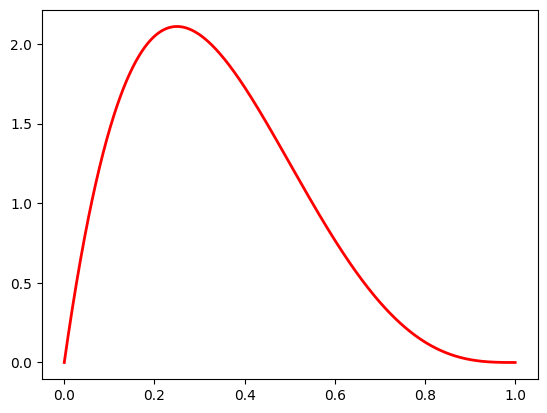

In [11]:
# Graficar la función de densidad de probabilidad f(x)
x = np.linspace(0, 1, 1000)
plt.plot(x, f(x), 'r-', lw=2, label='f(x)')

# Graficar la función auxiliar g(x)
#plt.plot(x, g(x) * c, 'b--', lw=2, label='c * g(x)')


In [12]:
#Obtenemos la media
media = np.mean(G)
print(media)

0.3345387423425262


In [13]:
#Obtenemos la varianza
varianza =np.var(G)
print(varianza)

0.03200165069237173


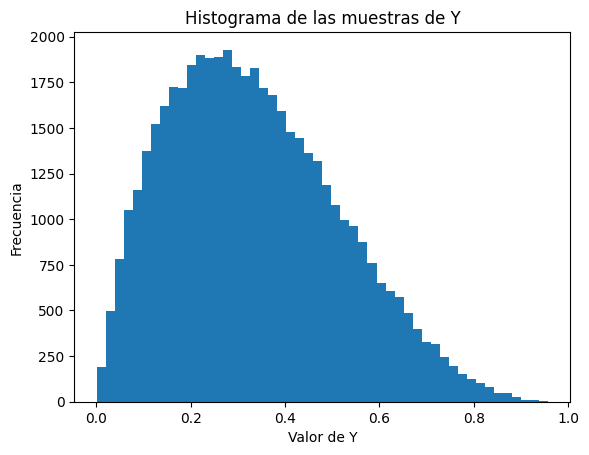

In [14]:
# Graficar un histograma de las muestras de Y
plt.hist(G, bins=50)
plt.title('Histograma de las muestras de Y')  # Nombre de la gráfica
plt.xlabel('Valor de Y')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()

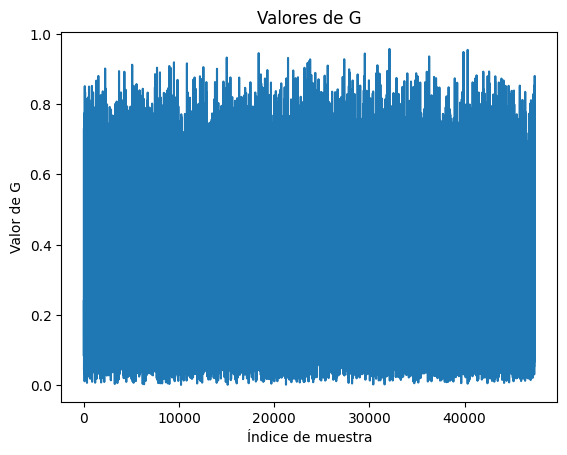

In [15]:
# Graficar los valores de G utilizando plt.plot
plt.plot(G)
plt.title('Valores de G')  # Nombre de la gráfica
plt.xlabel('Índice de muestra')  # Etiqueta del eje x
plt.ylabel('Valor de G')  # Etiqueta del eje y
plt.show()

In [16]:
def cdf(G):
  n=len(G) # Obtiene el número de elementos en G
  x=np.sort(G) # Ordena los elementos de G de menor a mayor
  y=np.arange(0,n)/n  # Calcula los valores de la CDF empírica
  return x,y # Retorna los valores ordenados y los valores de la CDF empírica

In [17]:
X,Y =cdf(G)

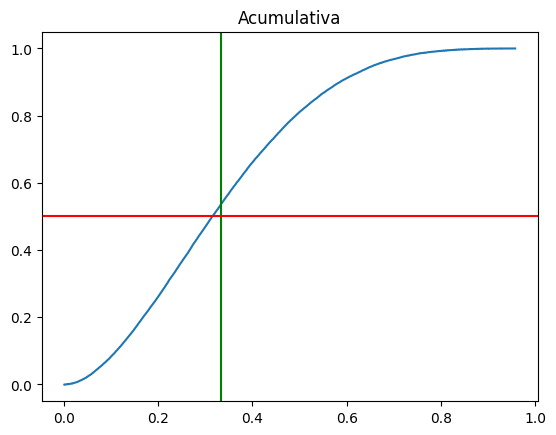

In [18]:
#Gráfica de la Distribución
plt.step(X, Y)  # Grafica la distribución usando el método de pasos
plt.title('Acumulativa')
plt.axvline(media, color="green")  # Línea vertical en la posición de la media, de color verde
plt.axhline(0.5, color="red")      # Línea horizontal en y=0.5, de color rojo
